# The Non Random Two Liquids (NRTL) model for *excess Gibbs energy* ($g^E$) and a case study of the Liquid-Liquid equilibria of water+ethanol+ethyl acetate.

# The Non Random Two Liquids (NRTL) model

Calculates excess Gibbs energy and its derivatives: e.g. activity coefficients $\underline{\gamma}$ and excess molar enthalpy $h^E$ at given $T$, $P$ and composition $\underline {x}$ for a liquid mixture.


## Model overview


$$ \frac{g^E}{RT}=\sum_{i=1}^n \left[ x_i\frac{\sum_{j=1}^n \left[ \tau_{j,i} G_{j,i} x_{j} \right] }{\sum_{k=1}^n \left[ G_{k,i} x_k \right] } \right] $$

Where

> $\tau_{i,j}= \frac{g_{i,j}-g_{j,j}}{RT}=\frac{A_{i,j}}{T}$
>
> $G_{i,j}=\mathrm{exp}(-\alpha_{i,j} \tau_{i,j})$

And either each $(g_{i,j}-g_{j,j})$ difference, in units of energy, or  each $A_{i,j}$ binary parameter, in units of temperature, are usually fitted to experimental data and published.

The activities coefficients are calculated from the derivative of excess gibbs energy with respect to mole number of componente i ($n_i=N x_i$) with T, P and mole number of every other component held constant, ($RTln(\gamma_i) = {\partial g^E}/{ \partial n_i}$)therefore:


$$ln(\gamma_i)=  \frac{\sum_{j=1}^n\left[\tau_{j,i} G_{j,i} x_{j}\right]}{\sum_{k=1}^n\left[G_{k,i}x_{k}\right]} + \sum_{j=1}^n\left[ \left(\frac{\ G_{i,j} x_{j}}{\sum_{k=1}^n\left[G_{k,j}x_{k}\right]}\right) \left(\tau_{i,j}-\frac{\sum_{k=1}^n\left[\tau_{k,i} G_{k,i} x_{k}\right]}{\sum_{k=1}^n\left[G_{k,j}x_{k}\right]} \right) \right] $$

## References:

### The NRTL model' original paper
* Renon H., Prausnitz J. M., Local Compositions in Thermodynamic Excess Functions for Liquid Mixtures, AIChE J., 14_1, S.135–144, 1968 [doi:10.1002/aic.690140124](https://doi.org/10.1002/aic.690140124)



### The NRTL model in some books
* Prausnitz, Lichtenthaler & Azevedo, Molecular Thermodynamic of Fluid Phase Equilibria, 1998 [ISBN-10: 0139777458](https://books.google.com.br/books?id=VSwc1XUmYpcC)

### More papers on the NRTL model
* Abreu, C. R. A., Matrix Algebra and Matrix Differentiation Rules Applied to Excess Gibbs Energy Models, Lecture notes available [here][Abreu, yyyy, LN, Matrix algebra...].

[Abreu, yyyy, LN, Matrix algebra...]: https://github.com/iurisegtovich/PyTherm-applied-thermodynamics/blob/master/Get_involved/4_Texts_Library/AbreuC.R.A.%2C%20Matrix%20Algebra%20and%20Matrix%20Differentiation%20Rules%20Applied%20to%20Excess%20Gibbs%20Energy%20Models.pdf

# Starting the computational implementation of the model:

Gather the needed packages here

In [61]:
import numpy as np

## Model inputs

Experimental parameters from Renon et al., (1969)

### References:

Renon, Henri, and J. M. Prausnitz. "Estimation of parameters for the NRTL equation for excess Gibbs energies of strongly nonideal liquid mixtures." Industrial & Engineering Chemistry Process Design and Development 8.3 (1969): 413-419.
[DOI:10.1021/i260031a019]( https://doi.org/10.1021/i260031a019)

## Thermodynamics *degrees of freedom*
Excess gibbs energy, and activity coefficients are natural functions of temperature $(T)$, pressure $(P)$ and composition $(\underline{x})$.
Here, we will consider the system studied by Renon et al. (1969), they regressed parameters with which the model is valid for constant pressure of 1 atm.
The remaining thermodynamics *degrees of freedom* required to calculate a set of activity coefficients are the temperature and composition.
We set trial values below:

In [85]:
#trial temperature and composition:
T = 293.15 #K
x=np.array([.1,.3,.6]) #normalized

## Fitted parameters
Renon et al. (1969) fitted 1 $\alpha$ valid for all 3 binary interactions $\{(1,2),(1,3),(2,3)\}$ parameter and 6 $A_{i,j}$ parameters, two for each binary interaction filling a non symmetric $A$ matrix.

In [86]:
# Ethyl acetate (1) + water (2) + ethanol (3)


alpha12 = 0.4

alpha23 = 0.3

alpha13 = 0.3

# 6 binary Aij parameters
Dg12 = 1335 #K
Dg21 = 2510 #K

Dg23 = 976 #K
Dg32 = 88 #K

Dg13 = 301 #K
Dg31 = 322 #K


## Feeding the fitted parameters to the model in matrix structure:
we will assemble the parameters in a matrix structure so that we can access each parameter by its index, as in
`A[0,0]` and `A[0,1]`rather than as `A11` and `A12`, so we can loop trough all of them using an iterator, see below:

In [87]:
#assemble matrix with regressed parameters Dg_i,j, according to the model all diagonal terms are zero
Dg = np.array([[0, Dg12, Dg13],
             [Dg21, 0, Dg23],
             [Dg31, Dg32, 0]])

A = Dg/R

#assemble symmetric matrix alpha
alpha = np.array([[0, alpha12, alpha13],
                [alpha12, 0, alpha23],
                [alpha13, alpha23, 0]])

In [88]:
#verify the assembled matrices

#we can now automatically loop through its elements

print("i,j,alpha[i,j],A[i,j]")
for i in range(3):
    for j in range(3):
        print(i,j,alpha[i,j],A[i,j])
        
#or even use the whole matrix at once
print("alpha=")
print(alpha)
print("A=")
print(A)


# rather than typing each element indiividually
print("alpha12,alpha13,alpha23")
print(alpha12,alpha13,alpha23)
print("A12,A13,A21,A23,A31,A32")
print(A12,A13,A21,A23,A31,A32)

i,j,alpha[i,j],A[i,j]
0 0 0.0 0.0
0 1 0.4 160.572528266
0 2 0.3 36.2039932644
1 0 0.4 301.900408949
1 1 0.0 0.0
1 2 0.3 117.392350253
2 0 0.3 38.7298532596
2 1 0.3 10.5845561703
2 2 0.0 0.0
alpha=
[[ 0.   0.4  0.3]
 [ 0.4  0.   0.3]
 [ 0.3  0.3  0. ]]
A=
[[   0.          160.57252827   36.20399326]
 [ 301.90040895    0.          117.39235025]
 [  38.72985326   10.58455617    0.        ]]
alpha12,alpha13,alpha23
0.4 0.3 0.3
A12,A13,A21,A23,A31,A32
107.99 1011.98 555.81 -1113.1 2277.37 1217.37


## Model equations
We first implement the model equations in a script-wise manner, considering the models input - the regressed parameters and thermodynamic degrees of freedom previously defined.

In [89]:
tau=np.zeros([3,3])
for j in range(3):
    for i in range(3):
        tau[j,i]=A[j,i]/T
print("tau=")
print(tau)
        
G=np.zeros([3,3])
for j in range(3):
    for i in range(3):
        G[j,i]=np.exp((-alpha[j,i]*tau[j,i]))
print("G=")
print(G)

tau=
[[ 0.          0.54774869  0.12349989]
 [ 1.0298496   0.          0.40045148]
 [ 0.13211616  0.03610628  0.        ]]
G=
[[ 1.          0.80324181  0.96362798]
 [ 0.66236412  1.          0.88680032]
 [ 0.96114034  0.98922657  1.        ]]


In [90]:
Gamma=np.zeros([3])
for i in range(3):

    Sj1=0
    Sj2=0
    Sj3=0
    for j in range(3):
        Sj1     += tau[j,i]*G[j,i]*x[j]
        Sj2     += G[j,i]*x[j]

        Sk1=0
        Sk2=0
        Sk3=0
        for k in range(3):
            Sk1+=G[k,j]*x[k]
            Sk2+=x[k]*tau[k,j]*G[k,j]
            Sk3+=G[k,j]*x[k]
        
        Sj3     += ((x[j]*G[i,j])/(Sk1))*(tau[i,j]-(Sk2)/(Sk3))
    
    Gamma[i]=np.exp(Sj1/Sj2 + Sj3)
    
print(Gamma)

[ 1.49680164  1.28852206  1.01628464]


## *Functionize* the model

> "taking a block of code and converting it into a function that can be inherited (or included once) and called by various other programs sometimes over and over again." -[functionize](http://www.urbandictionary.com/define.php?term=functionize)

In order for us to be able to re-use this model in different works we would like to functionize it, so we could call this function with different parameters and thermodynamic conditions, and with that make recursive usage to:
* create plots for a given system - varying x and T
* find solutions in phase equilibrium algorithms - varying x and T
* study different systems - varying component-dependent parameters
* perform parameter regression - varying parameter values to correlate data for a given system

$$\underline{\gamma} \leftarrow {\gamma} \left(T,\underline {x}, \underline {\underline{\alpha}}, \underline {\underline{\tau}}\right)$$

## def model(arguments):
Functionizing the model is straightforward: we just copy the expressions already presented in the script-wise approach
and then wrap them in a `def` block with clear inputs:

    def Gamma(T,x,alpha,A):

and clear outputs:

    return Gamma

In [91]:
def Gamma(T,x,alpha,AA):
    tau=np.zeros([3,3])
    for j in range(3):
        for i in range(3):
            tau[j,i]=A[j,i]/T    
    
    G=np.zeros([3,3])
    for j in range(3):
        for i in range(3):
            G[j,i]=np.exp((-alpha[j,i]*tau[j,i]))
    
    Gamma=np.zeros([3])
    for i in range(3):

        Sj1=0
        Sj2=0
        Sj3=0
        for j in range(3):
            Sj1 += tau[j,i]*G[j,i]*x[j]
            Sj2 += G[j,i]*x[j]
    
            Sk1=0
            Sk2=0
            Sk3=0
            for k in range(3):
                Sk1 += G[k,j]*x[k]
                Sk2 += x[k]*tau[k,j]*G[k,j]
                Sk3 += G[k,j]*x[k]
            
            Sj3 += ((x[j]*G[i,j])/(Sk1))*(tau[i,j]-(Sk2)/(Sk3))
        
        Gamma[i]=np.exp(Sj1/Sj2 + Sj3)
    
    return Gamma

In [92]:
#test it to see if results match
ans=Gamma(T,x,alpha,A)
print(ans) #ttest using those trial input

[ 1.49680164  1.28852206  1.01628464]


In [93]:
# test predictions of activity coefficients at infinite dillution
ans=Gamma(T,[1,0,0],alpha,A)
print("in ~pure Ethyl acetate liquid, Ethyl acetate's itself activity coefficient is ",ans[0])
print("ethanol infinite dillution activity coefficient is ", ans[2])
print("and water infinite dillution activity coefficient is ", ans[1])

ans=Gamma(T,[0,1,0],alpha,A)

print("in ~pure ethanol liquid, ethanol's itself activity coefficient is ",ans[2])
print("Ethyl acetate infinite dillution activity coefficient is ", ans[0])
print("and water infinite dillution activity coefficient is ", ans[1])

ans=Gamma(T,[0,0,1],alpha,A)

print("in ~pure water liquid, water's itself activity coefficient is ",ans[1])
print("ethanol infinite dillution activity coefficient is ", ans[2])
print("and Ethyl acetate infinite dillution activity coefficient is ", ans[0])

in ~pure Ethyl acetate liquid, Ethyl acetate's itself activity coefficient is  1.0
ethanol infinite dillution activity coefficient is  1.28464455007
and water infinite dillution activity coefficient is  3.42083308792
in ~pure ethanol liquid, ethanol's itself activity coefficient is  1.54676981851
Ethyl acetate infinite dillution activity coefficient is  4.34847080764
and water infinite dillution activity coefficient is  1.0
in ~pure water liquid, water's itself activity coefficient is  1.47879383184
ethanol infinite dillution activity coefficient is  1.0
and Ethyl acetate infinite dillution activity coefficient is  1.28546962045


## As a first graphical result we can plot the Excess Gibbs energy as a function of mole fraction of one component ina  binary mixture

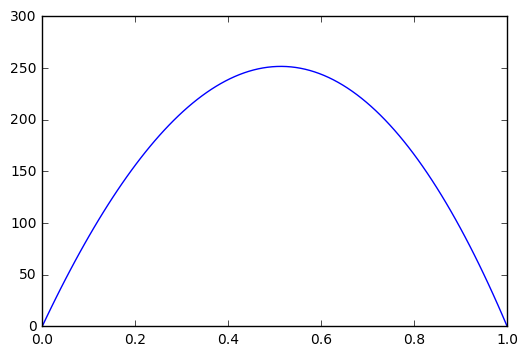

In [94]:
T=298
xW=np.linspace(0,1,100)
xE=1-xW
Ge=np.zeros(100)
R=8.314

for i in range(100):
    gammas=Gamma(T,[0,xE[i],xW[i]],alpha,A)
    Ge[i]=(R*T*(xE[i]*np.log(gammas[1])+xW[i]*np.log(gammas[2])))

from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(xE,Ge)
plt.show()

# Applying linear algebra matrix notation

This implementation can be rewritten using linear algebra matrix notation, this can simplify analytical derivations, improve readability (although for the trained mind), maintainability, reduce human error in the coding (less typing therefore less typos), and improve execution speed (if we make use of libraries that can automatically convert matrix notation to optimal implementation of the underlying loops - e.g. NumPy).
For details on the derivations of the matrix notation for the NRTL model, as well as for UNIQUAC, UNIFAC and COSMO see the lectures notes of Abreu, C. R. A. in our library [here][Abreu, yyyy, LN, Matrix algebra...].

[Abreu, yyyy, LN, Matrix algebra...]: https://github.com/iurisegtovich/PyTherm-applied-thermodynamics/blob/master/Get_involved/4_Texts_Library/AbreuC.R.A.%2C%20Matrix%20Algebra%20and%20Matrix%20Differentiation%20Rules%20Applied%20to%20Excess%20Gibbs%20Energy%20Models.pdf

| - - - - - - - - - - - - - - Renon & Prausnitz - - - - - - - - - - - - - - | - - - - - - - - - - - - - - Abreu - - - - - - - - - - - - - - |
|:-:|:-:|
|$ \frac{g^E}{RT}=\sum_{i=1}^n \left[ x_i\frac{\sum_{j=1}^n \tau_{j,i} G_{j,i} x_{j}}{\sum_{k=1}^n G_{k,i} x_k} \right] $|$ \frac{g^E}{RT}=\underline{x}^T\underline{\underline{E}} \underline{x}$ |

Where

| - - - - - - - - - - - - - - Renon & Prausnitz - - - - - - - - - - - - - - | - - - - - - - - - - - - - - Abreu - - - - - - - - - - - - - - |
|:-:|:-:|
|$\tau_{i,j}= \frac{g_{i,j}-g_{j,j}}{RT}=\frac{A_{i,j}}{T}$ | $\underline{\underline{\tau}}=-T^{-1}\underline{\underline{A}}$|
|$G_{i,j}=\mathrm{exp}(-\alpha_{i,j} \tau_{i,j})$|$\underline{\underline{G}}= \mathrm{exp}(\underline{\underline{\alpha}} \circ \underline{\underline{\tau}})$|
|---|$\underline{\underline{\Lambda}}=(\underline{\underline{\tau}} \circ \underline{\underline{G}})$|
|---|$\underline{\underline{E}}=\underline{\underline{\Lambda}}\mathscr{D}^{-1}(\underline{\underline{G}}^T\underline{x})$|

Therefore


| - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - Renon & Prausnitz - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - | - - - - - - - - - - - Abreu - - - - - - - - - - - |
|:-:|:-:|
|$ln(\gamma_i)=  \frac{\sum_{j=1}^n\left[\tau_{j,i} G_{j,i} x_{j}\right]}{\sum_{k=1}^n\left[G_{k,i}x_{k}\right]} + \sum_{j=1}^n\left[ \left(\frac{\ G_{i,j} x_{j}}{\sum_{k=1}^n\left[G_{k,j}x_{k}\right]}\right) \left(\tau_{i,j}-\frac{\sum_{j=1}^n\left[\tau_{i,j} G_{i,j} x_{i}\right]}{\sum_{k=1}^n\left[G_{k,j}x_{k}\right]} \right) \right] $|$ ln(\underline{\gamma})=\left(\underline{\underline{E}}^S-\underline{\underline{L}}\mathscr{D}\underline{x}\underline{\underline{E}}^T \right)\underline{x}$|

Where

* $\underline{\underline{M}} \circ \underline{\underline{N}}$ is the Hadamard product, element-wise multiplication between matrices $\underline{\underline{M}} $and$ \underline{\underline{N}}$, i.e.,
$$\underline{\underline{M}} \circ \underline{\underline{N}} = \left\{ \underline{\underline{R}} \mid R_{i,j}=M_{i,j} \times N_{i,j} \right\}$$

* $\mathscr{D}\underline{v}$ means matrix diagonalization of an column $\underline{v}$, i.e.,
$$\mathscr{D}\underline{v}= \left\{ \underline{\underline{M}} \mid M_{i,j}=v_{i} \text { if } {j = i} \text{, and } M_{i,j} = 0 \text { if } {j \neq i} \right\}$$

* $\underline{\underline{M}}^S$ means symmetrization of a matrix $\underline{\underline{M}}$, i.e.,
$$\underline{\underline{M}}^S= \left\{ \underline{\underline{N}} \mid N_{i,j}=M_{i,j}+M_{j,i}\right\}$$
* $\underline{\underline{M}}^T$ means transposition of a matrix $\underline{\underline{M}}$, i.e.,
$$\underline{\underline{M}}^T= \left\{ \underline{\underline{N}} \mid N_{i,j}=M_{j,i} \right\}$$

* **matrix multiplication**

> Replace summations of matrices in one of its dimensions

  * elemental definition:

$C_{i,j} = \sum_k{\left[A_{i,k} \times B_{k,j}\right]}$

$d_{i} = \sum_k{\left[A_{i,k} \times b_{k}\right]}$

$e_{j} = \sum_k{\left[a_{k} \times B_{k,j}\right]}$

  * matrix notation

$\underline{\underline{C}}=\underline{\underline{A}}\underline{\underline{B}}$

$\underline{d}=\underline{\underline{A}}\underline{b}$

$\underline{e}=(\underline{a^T}\underline{\underline{B}})^T$


  * python implementation

`C = A @ B`

`d = A @ b`

`e = (a.T @ B).T`

* **element-wise multiplication**

> Condensate operations that apply analogously in all elements of one or more matrices

  * elemental definition:

$C_{i,j} = A_{i,j} \times B_{i,j}$

  * matrix notation

$\underline{\underline{C}}=\underline{\underline{A}} \circ \underline{\underline{B}}$

  * python implementation

`C = A * B`

* **element-wise multiplication with broadcasting**

> Diagonalization is used to represent element-wise multiplication between: two single line matrixes, two single columns, one single line matrix and each line of a (nl,nc) matrix, or one single column matrix and each column of a (nl,nc) matrix. This is useful in analytical differentiation presented in the lecture notes of [Abreu C. R. A.][Abreu, yyyy, LN, Matrix algebra...].
On the other hand, this notation may be dropped later, at implementation time, for a numerical solution, depending on the programming enviroment, see below the usage and correspondence of notations:

[Abreu, yyyy, LN, Matrix algebra...]: https://github.com/iurisegtovich/PyTherm-applied-thermodynamics/blob/master/Get_involved/4_Texts_Library/AbreuC.R.A.%2C%20Matrix%20Algebra%20and%20Matrix%20Differentiation%20Rules%20Applied%20to%20Excess%20Gibbs%20Energy%20Models.pdf

  * elemental definition:

$C_{i,j} = A_{i,j} \times b_{j}$

$D_{i,j} = b_{i} \times A_{i,j}$

$e_{i} = a_{i} \times b_{i}$

$f_{j} = b_{j} \times a_{j}  $

  * matrix notation

$\underline{\underline{C}}=\underline{\underline{A}} \left( \mathscr D \underline{b} \right )$

$\underline{\underline{D}}= \left( \mathscr D \underline{b} \right ) \underline{\underline{A}}$

$\underline{e}= \left( \mathscr D \underline{a} \right ) \underline{b}$

$\underline{f}=\left( \underline{b}^{T} \left( \mathscr D \underline{a} \right ) \right)^T$

  * python implementation

`C = A * b.T`

`D = b * A`

`e = a * b`

`f = (b.T * a.T).T`

> where we chose to use:
>- upper case letters to represent full (nl,nc) matrixes
>- lower case letters to represent single column matrixes)
>
> while from Python/NumPy syntax:
>- `M.T` is the numpy native syntax for transposition of a matrix `M`
>- `A \* B` is the numpy native syntax for the element-wise multiplication between matrixes `A` and `B`

Note that in matrix algebra in python, single columns and single line matrixes should be represented by 2d arrays having shape (nl,1) and (1,nc), respectively. This is not quite the same thing as 1d arrays. Understand the differences seeing usage examples [here][Lists and array operations].

> where:
>- nl stands for number of lines in a single column (nl,1) matrix or in a full (nl,nc) matrix
>- nc stands for number of columns in a single line (1,nc) matrix or in a full (nl,nc) matrix

[Lists and array operations]: http://localhost:8888/notebooks/LocalWorkspaces/Pytherm/GITSYNC/Get_involved/5_Syntax_cheat_sheets%2C_examples%2C_samples%2C_tests/List%20and%20Array%20operations.ipynb

## Use linear algebra in the model

In [95]:
def Gamma_linalg(T,c_x,q_alpha, q_A): # here we chose to use the starting letters s, c, l, and Q to identify scalar variables, single column matrixes, single line matrixes and square matrixes to the reader
    # e_T should be an scalar value for temperature
    # c_x should be a single-column matrix(2d array) representing composition
    # q_alpha should be two matrix(2d array) representing component dependent parameters inferred from experimental data
    # q_tau should be two matrix(2d array) representing component dependent parameters inferred from experimental data
    
    q_tau     = q_A/T #element-wise division by scalar
    q_at      = q_alpha*q_tau #M2d * N2d yields element-wise multiplication
    q_minusat     = -q_at #element wise signal change
    q_G       = np.exp(q_minusat) #element wise exponentiation
    q_Lambda  = (q_tau*q_G) #element-wise multiplication
    q_GT      = q_G.T #M.T yields the transpose matrix of M;
    c_den     = q_GT @ c_x #M @ N yields the matrix multiplication between M and N
    c_invden  = 1/c_den #scalar 1 is broadcast for element-wise division
    l_invden  = c_invden.T #transposition of a single column matrix yields a single line matrix
    q_E       = q_Lambda * l_invden #element wise multiplication between (nl,nc) matrix M with (1,nc) matrix l broadcasts the element-wise multiplication of each (1,nc) submatrix of M with the unique (1,nc) matrix l
    q_L       = q_G * l_invden #broadcasting of element-wise multiplication
    l_x       = c_x.T #transposition of a single column matrix yields a single line matrix
    q_Lx      = q_L * l_x #broadcasting of element-wise multiplication
    q_ET      = q_E.T #transposition of square matrix
    q_LxET    = q_Lx @ q_ET #matrix multiplication
    q_ES      = q_E+q_ET #element-wise sum
    q_ESminusLxET = q_ES-q_LxET #element-wise subtraction
    q_ESminusLxETx     = q_ESminusLxET @ c_x #matrix multiplication
    gamma     = np.exp(q_ESminusLxETx) #element-wise exponentiation
    return gamma

In [96]:
#a test case for the function
#where x was the composition represented in a 1d array
#and now line and x_as_column is a single lne and a single column matrix, respectively to represent composition
#We build it using the array function to wrap the 1d array in another 1d aray, hence a 2d array
x_as_line = np.array([x])
#We transpose x_as_line to creata x_as_column, which is the shape expected by the linalgGamma function
x_as_column = np.array([x]).T #we wrap x with an extra braket so it is now a 2d array, a matrix, as we did not add any extra lines it is a single-line matrix, we tranpose to generate a single-column matrix (1d arrays cannot be transposed, there is no second dimension)
#print the output to see if errors occur and if values are coherent(between zero and infinity, tending to 1 for ideal solutions)
print(Gamma_linalg(T,x_as_column,alpha,A)) #test using those trial input

[[ 1.48877982]
 [ 1.28373249]
 [ 1.01599751]]


In [97]:
def Gamma_linalg_tiny(T,c_x,q_alpha, q_A):
    #note that we used many lines for didatics
    #we can do it in few lines:
    #note that some expression occur more than once below
    #so it may be useful define it as a intermediary recurrent term here
    #and calculate it once to use it then several times
    q_tau     = q_A/T
    q_G       = np.exp(-(q_alpha*q_tau))
    l_D       = ((1/((q_G.T) @ c_x)).T)
    q_E       = (q_tau*q_G) * l_D 
    gamma     = np.exp(((q_E+(q_E.T))-(((q_G * l_D) * (c_x.T)) @ (q_E.T))) @ c_x)
    return gamma

In [98]:
#test it to see that the results are the same
print(Gamma_linalg_tiny(T,x_as_column,alpha,A)) #test using those trial input

[[ 1.48877982]
 [ 1.28373249]
 [ 1.01599751]]


# What difference does it make?

Ipython provides a profiling tool, with %timeit you can evaluate the time for execution of a line of program (with all called dependencies). In the following cells, we use it to evaluate our function in version 1 with explicit for loops and in version 2a and 2b with linear algebra matrix operations

In [99]:
%timeit Gamma(T,x,alpha,A) #ttest using those trial input #My result was 90 micro seconds per loop

10000 loops, best of 3: 135 µs per loop


In [100]:
%timeit Gamma_linalg(T,x_as_column,alpha,A) #ttest using those trial input #My result was 25 micro seconds per loop

The slowest run took 250.18 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 28.5 µs per loop


In [101]:
%timeit Gamma_linalg_tiny(T,x_as_column,alpha,A) #ttest using those trial input #My result was 25 micro seconds per loop

The slowest run took 155.03 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 29.3 µs per loop


here more honest trials with random input

In [102]:
%%timeit
#approximately time the random number generation to subtract later
# ~21 micro seconds per loop here
N=3
x=np.random.rand(N,1)
x=x/sum(x)
alpha=np.random.rand(N,N)
A=np.random.rand(N,N)
T=(np.random.rand(1,1)+.5)*273

The slowest run took 2798.41 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 21.5 µs per loop


In [103]:
%%timeit
# ~440 micro seconds per loop here (420 subtracting the random number generation)
N=3
x=np.random.rand(N,1)
x=x/sum(x)
alpha=np.random.rand(N,N)
A=np.random.rand(N,N)
T=(np.random.rand(1,1)+.5)*273

_=Gamma(
    T,
    x,
    alpha,
    A)

The slowest run took 17.80 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 3: 410 µs per loop


In [104]:
%%timeit
# ~56 micro seconds per loop here  (36 subtracting the random number generation)
N=3
x=np.random.rand(N,1)
x=x/sum(x)
alpha=np.random.rand(N,N)
A=np.random.rand(N,N)
T=(np.random.rand(1,1)+.5)*273

_=Gamma_linalg(
    T,
    x,
    alpha,
    A)

The slowest run took 89.87 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 56 µs per loop


In [105]:
%%timeit
# ~52 micro seconds per loop here (32 subtracting the random number generation)
N=3
x=np.random.rand(N,1)
x=x/sum(x)
alpha=np.random.rand(N,N)
A=np.random.rand(N,N)
T=(np.random.rand(1,1)+.5)*273

_=Gamma_linalg_tiny(
    T,
    x,
    alpha,
    A)

The slowest run took 147.78 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 57.3 µs per loop


# Maker it faster!
Also, with minor effort, we can use Numba to further accelerate the code.

See below how it is able to accelerate the functions `Gamma` `and Gamma_linalg_tiny` and compare.

In [106]:
#These two lines is all that it takes to accelerate this function
from numba import jit
@jit
#now repeat the function with a different bname so we can compare
def Gamma_numba(T,x,alpha,A):

    tau=np.zeros([3,3])
    for j in range(3):
        for i in range(3):
            tau[j,i]=A[j,i]/T    
    
    G=np.zeros([3,3])
    for j in range(3):
        for i in range(3):
            G[j,i]=np.exp((-alpha[j,i]*tau[j,i]))
    
    Gamma=np.zeros([3])
    for i in range(3):

        Sj1=0
        Sj2=0
        Sj3=0
        for j in range(3):
            Sj1 += tau[j,i]*G[j,i]*x[j]
            Sj2 += G[j,i]*x[j]
    
            Sk1=0
            Sk2=0
            Sk3=0
            for k in range(3):
                Sk1 += G[k,j]*x[k]
                Sk2 += x[k]*tau[k,j]*G[k,j]
                Sk3 += G[k,j]*x[k]
            
            Sj3 += ((x[j]*G[i,j])/(Sk1))*(tau[i,j]-(Sk2)/(Sk3))
        
        Gamma[i]=np.exp(Sj1/Sj2 + Sj3)
    
    return Gamma

In [107]:
#These two lines is all that it takes to accelerate this function
from numba import jit
@jit
#now repeat the function with a different bname so we can compare
def Gamma_linalg_tiny_numba(T,c_x,q_alpha, q_A):
    #note that we used many lines for didatics
    #we can do it one liner:
    #note that some expression occur more than once below so it may be useful define it as a intermediary recurrent term here and calculate it once to use it then several times
    q_tau     = q_A/T
    q_G       = np.exp(-(q_alpha*q_tau))
    l_D       = ((1/((q_G.T) @ c_x)).T)
    q_E       = (q_tau*q_G) * l_D 
    gamma     = np.exp(((q_E+(q_E.T))-(((q_G * l_D) * (c_x.T)) @ (q_E.T))) @ c_x)
    return gamma

In [108]:
%%timeit
# ~370 micro seconds per loop here (350 subtracting the random number generation, versus 420 thats not much acceleration)
N=3
x=np.random.rand(N,1)
x=x/sum(x)
alpha=np.random.rand(N,N)
A=np.random.rand(N,N)
T=(np.random.rand(1,1)+.5)*273

_ = Gamma_numba(
    T,
    x,
    alpha,
    A)

The slowest run took 4880.81 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 3: 421 µs per loop


In [109]:
%%timeit
# ~34 micro seconds per loop here (14 subtracting the random number generation, versus 32 thats approximately half)

N=3
x=np.random.rand(N,1)
x=x/sum(x)
alpha=np.random.rand(N,N)
A=np.random.rand(N,N)
T=(np.random.rand(1,1)+.5)*273

_ = Gamma_linalg_tiny_numba(
    T,
    x,
    alpha,
    A)

The slowest run took 10406.87 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 3: 168 µs per loop


# Incoming features:

* 3d plots of activity coefficient vs composition
>- gamma1 vs (x1,x2 | x3=1-x1-x2)
>- gamma2 vs (x1,x2 | x3=1-x1-x2)
>- gamma3 vs (x1,x2 | x3=1-x1-x2)

* Liq-Liq Equilibria flash algorithm

* 2d x1-x2-x3 triangle plots of phase equilibria envelope at given T and P

* Optimizing code with cython and numba, comparison with fortran and c

* Problem inversion: Regression of alpha and tau parameters from experimental data.